In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

# Define the root directory where the folders are located
root_dir = '/content/drive/MyDrive/Image_dataset'


# Create a custom dataset class to load images and labels.

In [3]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset
from torchvision import transforms

class BengaliHandwrittenDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        for label in os.listdir(root_dir):
            folder_path = os.path.join(root_dir, label)
            if os.path.isdir(folder_path):
                for image_name in os.listdir(folder_path):
                    image_path = os.path.join(folder_path, image_name)
                    if image_path.endswith(".png"):
                        self.image_paths.append(image_path)
                        self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path)  # Load image without converting
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


In [4]:
from torchvision import transforms

# Define the target size for resizing
target_size = (128, 128)  # Change this to the desired size

# Define any transformations (e.g., resize and convert to tensor)
transform = transforms.Compose([
    transforms.Resize(target_size),  # Resize the images
    transforms.ToTensor()  # Convert the images to tensor
])


In [5]:
# Create an instance of the dataset
dataset = BengaliHandwrittenDataset(root_dir=root_dir, transform=transform)


In [6]:
len(dataset)

111

In [7]:
i = 0
for i in range(len(dataset)):
  image, label = dataset[i]
  print(image.shape)
  print(label)
  i+=1
  if i == 10:
    break


torch.Size([1, 128, 128])
1
torch.Size([1, 128, 128])
1
torch.Size([1, 128, 128])
1
torch.Size([1, 128, 128])
1
torch.Size([1, 128, 128])
1
torch.Size([1, 128, 128])
1
torch.Size([1, 128, 128])
1
torch.Size([1, 128, 128])
1
torch.Size([1, 128, 128])
1
torch.Size([1, 128, 128])
1


In [8]:
from torch.utils.data import DataLoader

# Create a DataLoader to iterate through the dataset
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [11]:
# Example of iterating through the DataLoader
for images, labels in dataloader:
    print(images.shape)  # Should be (batch_size, 1, height, width)
    print("Lables are:",labels)  # Should print the batch of labels
    break  # Remove this break to iterate through the entire dataset


torch.Size([32, 1, 128, 128])
Lables are: ('1', '1', '3', '3', '3', '1', '2', '1', '1', '3', '3', '3', '1', '2', '2', '1', '3', '1', '1', '3', '1', '3', '2', '3', '1', '1', '3', '1', '3', '3', '1', '3')


torch.Size([32, 1, 128, 128])
('3', '1', '2', '2', '3', '3', '2', '3', '1', '3', '2', '1', '1', '3', '3', '2', '2', '3', '2', '3', '1', '1', '2', '3', '3', '2', '2', '3', '3', '3', '3', '3')


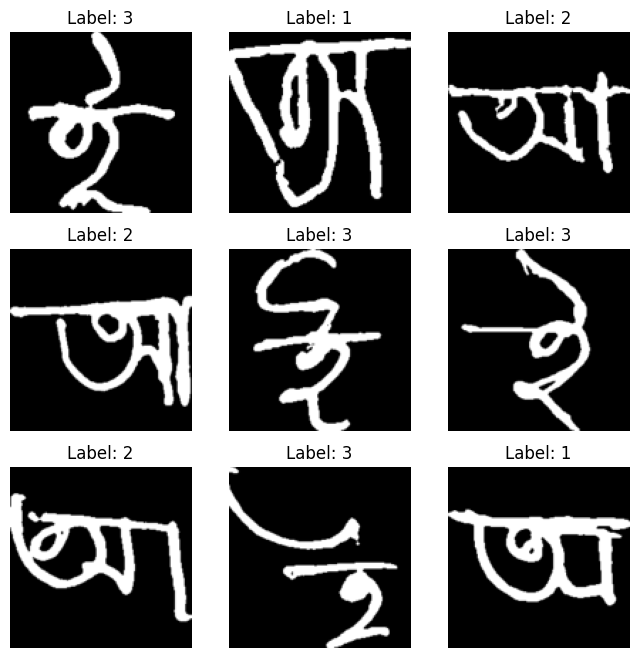

In [12]:
# Example of iterating through the DataLoader and displaying images
import matplotlib.pyplot as plt

for images, labels in dataloader:
    print(images.shape)  # Should be (batch_size, 1, height, width)
    print(labels)  # Should print the batch of labels

    # Display the first image in the batch
    plt.figure(figsize=(8, 8))
    for i in range(min(len(images), 9)):  # Display up to 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')

    plt.show()
    break  # Remove this break to iterate through the entire dataset